In [1]:
import qiskit
import numpy as np
from qiskit.quantum_info import Statevector
import nqs_models
from exact_solvers import GenericExactState
import utils
import torch

import Helper_fun as helper
import NSQST_Trainer as nsqst_trainer

from qiskit import QuantumCircuit, execute, Aer
import qiskit.providers.aer.noise as noise

In [2]:
N = 6
num_sites = N

test_circuit = helper.GHZ_circuit()

initial_dense = np.zeros(2**N, 'complex128')
initial_dense[0] = 1

test_state_dense = Statevector(initial_dense)
test_state_dense = np.array( test_state_dense.evolve(test_circuit).data )


nqs_transformer_1 = nqs_models.TransformerWF(num_sites = num_sites,
                                            num_layers=2,
                                            internal_dimension=8,
                                            num_heads=4,
                                            dropout=0.0)
nqs_model_ = nqs_transformer_1

In [3]:
# Hyperparameters
max_iters_=200
nqst_lr=1e-2
batch_size_=100
num_samples_ = 5000
K_ = 1

target_state_ = GenericExactState( utils.Complex(test_state_dense) )

optimizer_ = torch.optim.Adam(nqs_model_.parameters(), lr=nqst_lr)

state_file_name_ = 'param_GHZ' 

shadow_trainer_driver = nsqst_trainer.NSQST_Trainer(
                    nqs_model = nqs_model_,
                    circuit = test_circuit,
                    optimizer = optimizer_,
                    batch_size = batch_size_,
                    target_state = target_state_,
                    max_iters = max_iters_,
                    num_samples = num_samples_,
                    K = K_,
                    state_file_name = state_file_name_)


exact_nsqst, loss_nsqst = shadow_trainer_driver.train()



Iteration 0
Cost function is 0.9091735901907309
Exact infidelity is 0.9161711071682899
Iteration 1
Cost function is 1.0205759604227984
Exact infidelity is 0.8999558942530028
Iteration 2
Cost function is 0.8427783606175177
Exact infidelity is 0.8795394123419148
Iteration 3
Cost function is 0.9115226732031851
Exact infidelity is 0.8562685779164771
Iteration 4
Cost function is 0.8742107985334662
Exact infidelity is 0.8285007482518922
Iteration 5
Cost function is 0.8868066198465054
Exact infidelity is 0.7946467945062407
Iteration 6
Cost function is 0.49504491198675304
Exact infidelity is 0.7650508350254295
Iteration 7
Cost function is 1.0061378799339311
Exact infidelity is 0.7311081944452258
Iteration 8
Cost function is 0.3643988676396278
Exact infidelity is 0.6942266693109386
Iteration 9
Cost function is 0.6223902791709222
Exact infidelity is 0.6588420575290366
Iteration 10
Cost function is 0.4301045734914496
Exact infidelity is 0.6253114494404146
Iteration 11
Cost function is 0.561832828

Iteration 94
Cost function is 0.5895105822419694
Exact infidelity is 0.5084400239060507
Iteration 95
Cost function is 0.5077752733473451
Exact infidelity is 0.5077558515476304
Iteration 96
Cost function is 0.4448274072097703
Exact infidelity is 0.5071960263378897
Iteration 97
Cost function is 0.5538001201779414
Exact infidelity is 0.5068173787149348
Iteration 98
Cost function is 0.12104939396153302
Exact infidelity is 0.5109319435194628
Iteration 99
Cost function is 0.7752129564701382
Exact infidelity is 0.5203237636801296
Iteration 100
Cost function is 0.6021538875507912
Exact infidelity is 0.5432959647874565
Iteration 101
Cost function is 0.3758926394669553
Exact infidelity is 0.5719778081784141
Iteration 102
Cost function is 0.5852440412823844
Exact infidelity is 0.5949788916679397
Iteration 103
Cost function is 0.4208781133058208
Exact infidelity is 0.6076387624041324
Iteration 104
Cost function is 0.6314476576873244
Exact infidelity is 0.602703352293172
Iteration 105
Cost function

Iteration 185
Cost function is -0.007427986830336408
Exact infidelity is 0.1043541398574499
Iteration 186
Cost function is 0.22313225708022288
Exact infidelity is 0.21084509348531533
Iteration 187
Cost function is 0.2466640490660319
Exact infidelity is 0.21028204034104014
Iteration 188
Cost function is 0.110081088327309
Exact infidelity is 0.10584773978708517
Iteration 189
Cost function is -0.041606083793523485
Exact infidelity is 0.03539050512505704
Iteration 190
Cost function is 0.18092263419310284
Exact infidelity is 0.10899185255081145
Iteration 191
Cost function is 0.2627290953603513
Exact infidelity is 0.15662215212334385
Iteration 192
Cost function is 0.2881170879388101
Exact infidelity is 0.11638073406279559
Iteration 193
Cost function is -0.004525974491482954
Exact infidelity is 0.05386561817871194
Iteration 194
Cost function is 0.07756115811546294
Exact infidelity is 0.13089323239445083
Iteration 195
Cost function is 0.07696791284451987
Exact infidelity is 0.2592134460643325


Text(0, 0.5, 'Infidelity')

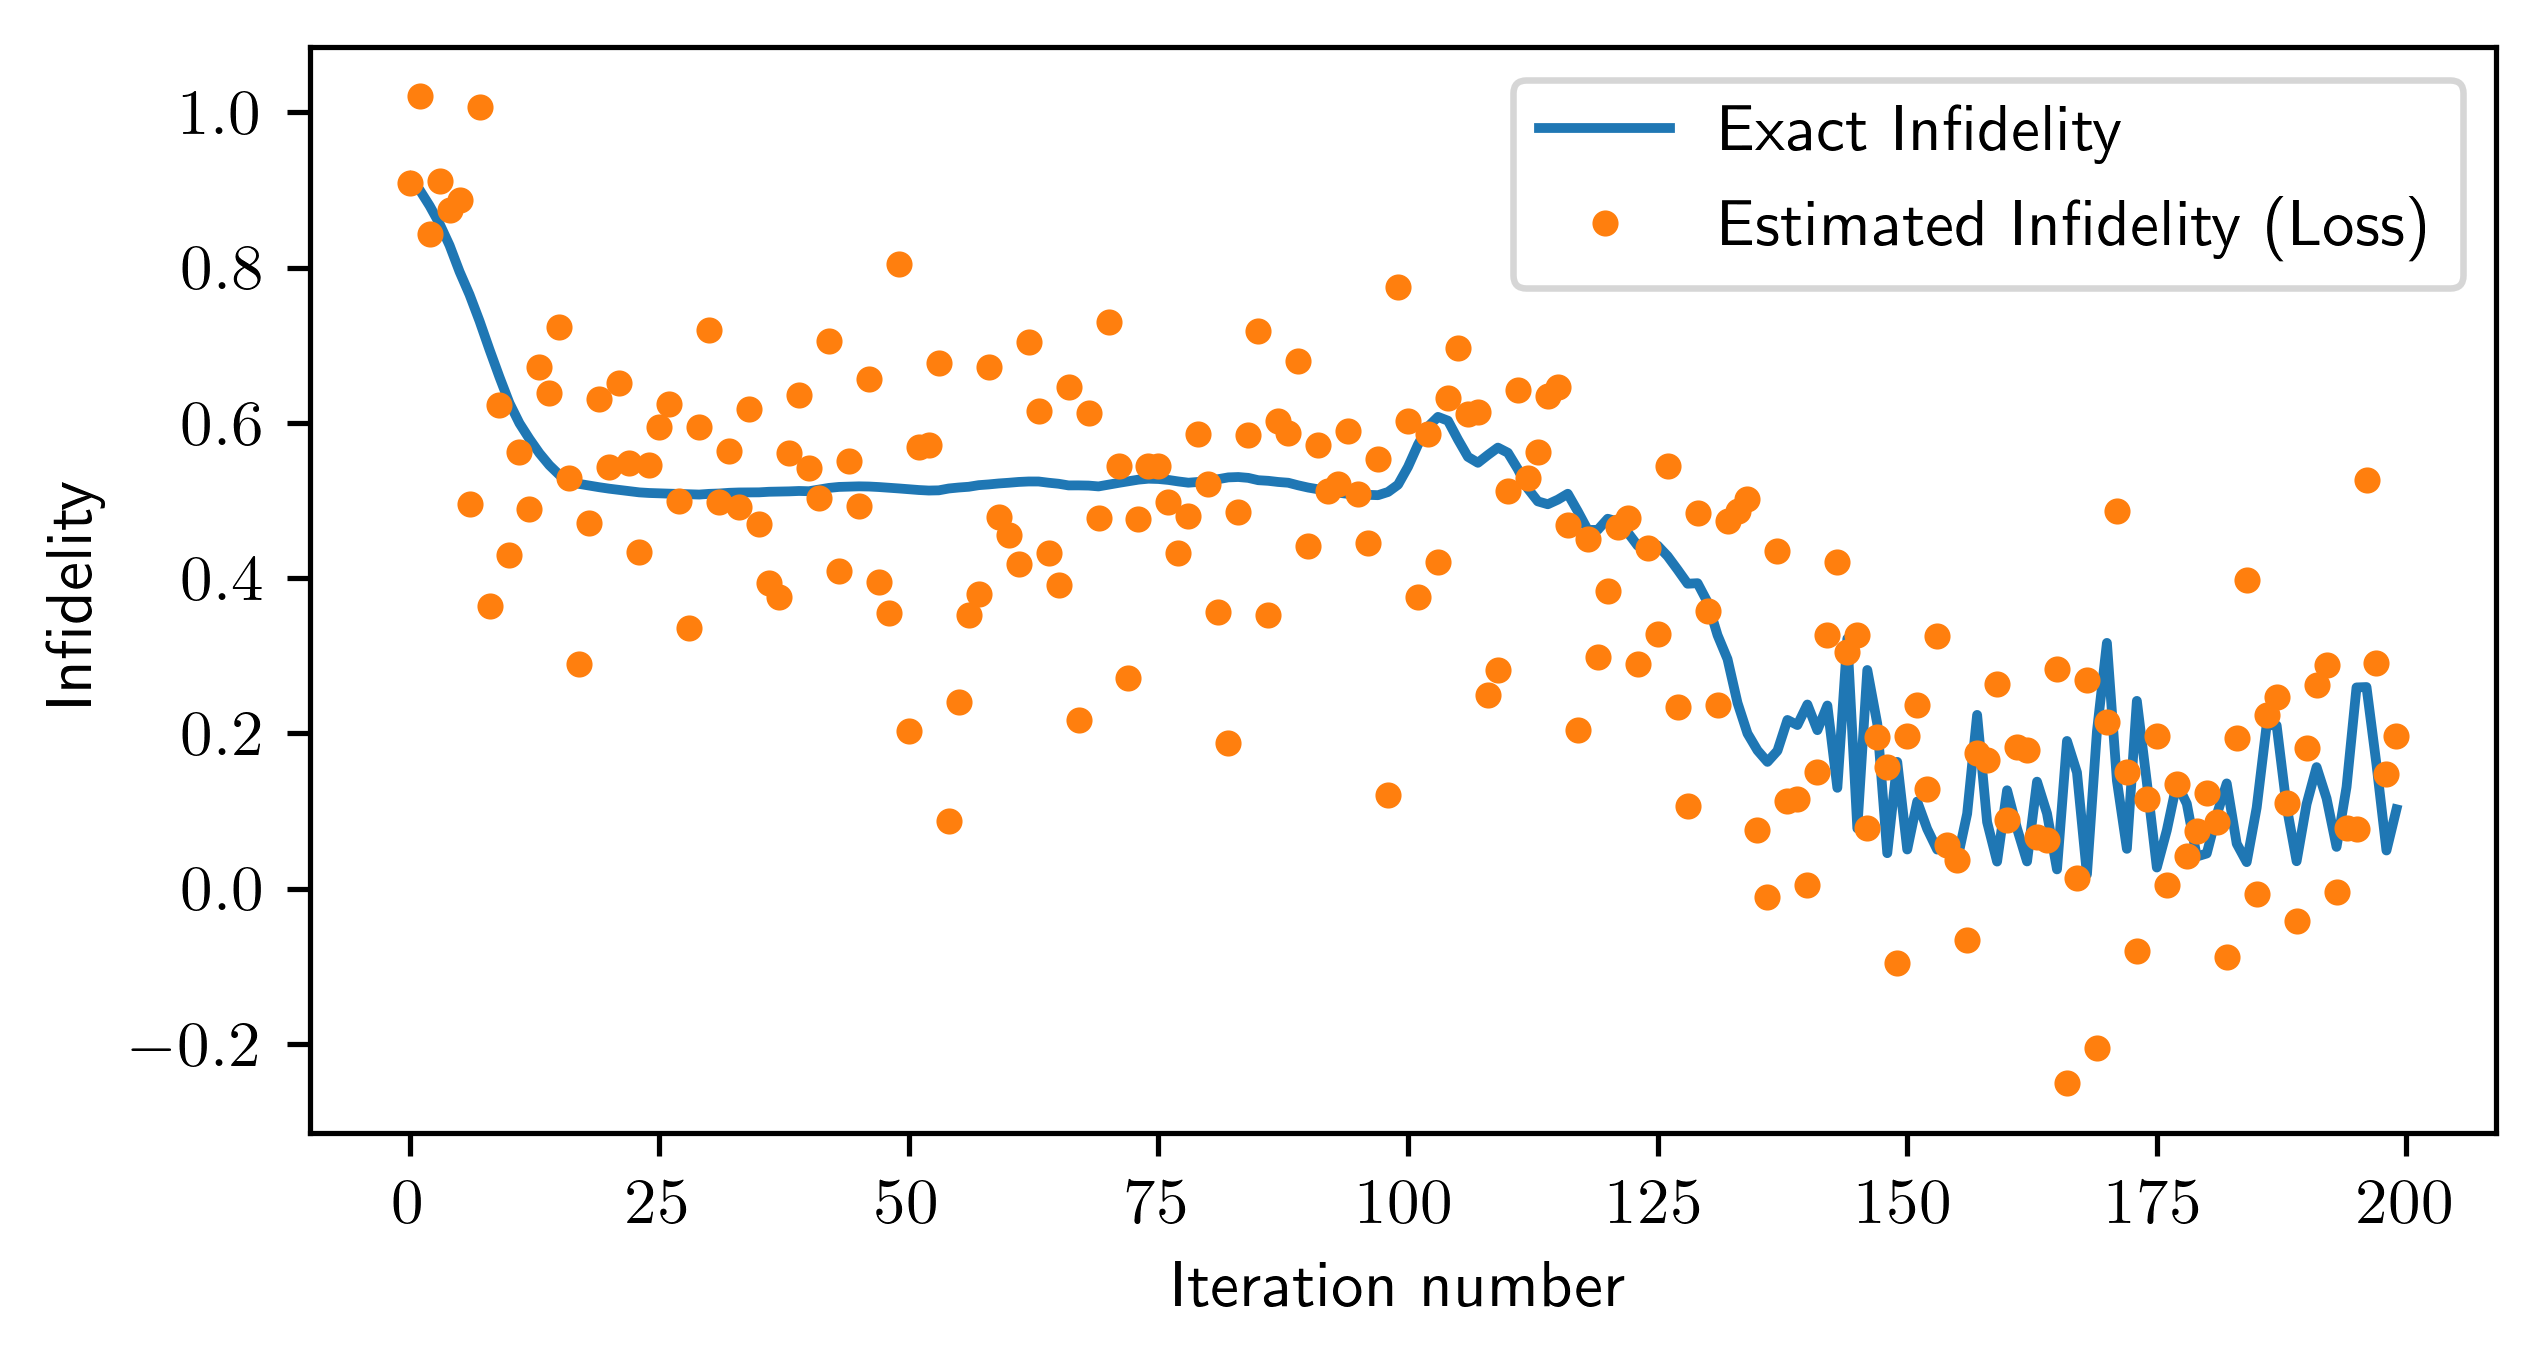

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 470
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (6,3)

iters_nsqst = np.linspace(0,len(loss_nsqst)-1, len(loss_nsqst))
plt.plot(iters_nsqst, exact_nsqst, label = 'Exact Infidelity')
plt.plot(iters_nsqst, loss_nsqst, '.', label = 'Estimated Infidelity (Loss)')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Infidelity')